### Gradient Descent Algorithm 

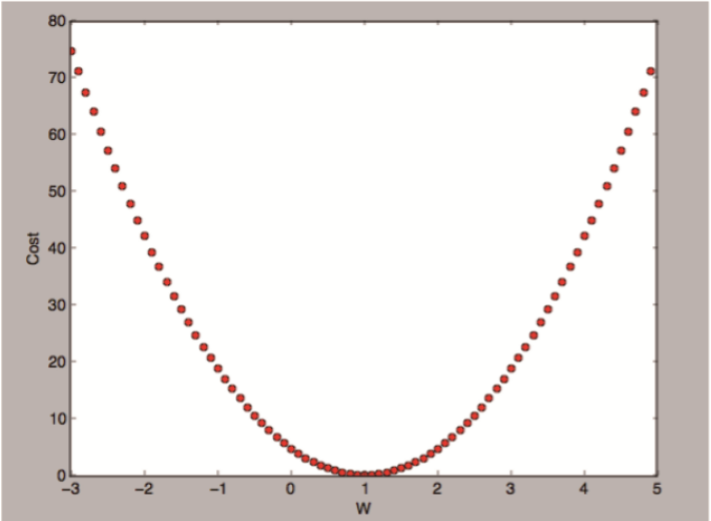

- W값은 어디에서 시작해도 된다
- 경사도를 따라서 한 발짝씩 움직인다 - cost 값이 작아지는 방향으로
- 미분계산해주는 웹사이트 : Derivative Calcurator 
- Gradient descent algorithm를 기계적으로 적용하면 된다. 

In [1]:
import tensorflow as tf
tf.set_random_seed(777)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

In [3]:
# We know that W should be 1 and b should be 0
W = tf.Variable(tf.random_normal([1]), name='weight')
# W = tf.Variable(-3.0) # 랜덤한 값, 말도 안되는 값으로 주어도 cost가 최저인 값을 찾아감

In [4]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [5]:
hypothesis = X * W

In [6]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [7]:
# 수동으로 경사면 따라가는 알고리즘 구현
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# train=optimizer.minimize(cost)

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 1.93919 [ 1.64462376]
1 0.551591 [ 1.34379935]
2 0.156897 [ 1.18335962]
3 0.0446285 [ 1.09779179]
4 0.0126943 [ 1.05215561]
5 0.00361082 [ 1.0278163]
6 0.00102708 [ 1.01483536]
7 0.000292144 [ 1.00791216]
8 8.30968e-05 [ 1.00421977]
9 2.36361e-05 [ 1.00225055]
10 6.72385e-06 [ 1.00120032]
11 1.91239e-06 [ 1.00064015]
12 5.43968e-07 [ 1.00034142]
13 1.54591e-07 [ 1.00018203]
14 4.39416e-08 [ 1.00009704]
15 1.24913e-08 [ 1.00005174]
16 3.5322e-09 [ 1.00002754]
17 9.99824e-10 [ 1.00001466]
18 2.88878e-10 [ 1.00000787]
19 8.02487e-11 [ 1.00000417]
20 2.34053e-11 [ 1.00000226]


In [10]:
# 검증
print(sess.run(hypothesis, feed_dict={X:[9,11]}))
print(sess.run(hypothesis, feed_dict={X:[11, 13, 15]}))

[  9.00002003  11.0000248 ]
[ 11.0000248   13.00002956  15.00003433]
